In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
titanic_df = pd.read_csv('titanic-data.csv')      #Import all the data from csv file to a dataframe
titanic_np = np.array(titanic_df['Age'].dropna())
titanic_age = np.array(titanic_df['Age'])
titanic_df.describe()                            #To get an insight of the data


C:\Users\Mirza\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Dictionary

Variable	Definition	        Key
survival	Survival	       0 = No, 1 = Yes
pclass	    Ticket class	   1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Introduction  


After a little peeking at the data, I came up with a couple of questions that I would like to explore and analyse to see if I can find their answers. These questions are:
  
##### Q1. Was their any particular Age group that was given priority over others?  
##### Q2. Were passengers that beloned to 1st Class were given more priority for rescue than passengers from other classes?  
##### Q3. Is their any corelation between Fare and Survival Rate?  
##### Q4. Does Gender play a role among the survivors?  
###### Q5. Is the Location of Passenger's Cabin a factor for Survival? 

In [32]:
titanic_wrangled_age = titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=False)  #To fill all missing values with mean

titanic_wrangled_age.describe()    

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Data Wrangling

Data Wrangling on Age Column was applied through imputation by mean age since there were 177 missing values out of 891, but the filled values were hindering the analysis so I didn't keep it in the dataframe that I would be using later on.  


In [33]:
temp_bin_age = titanic_df['Age']
bin_age = pd.cut(temp_bin_age, [0, 10, 20, 30, 40, 50, 60, 80], right=True)  #To divide Age values into groups

titanic_df_new = pd.concat([titanic_df, bin_age.rename('Bin_Age')], axis = 1) #To attach a new column to an existing dataframe

titanic_df_new


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 60]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 10]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(20, 30]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(10, 20]"


So starting from the first question, I first grouped all ages into bins of 10. I felt it was necessary to do so since the range is from 0 to 80 and analysing each age not only would be difficult but also messy. 

In [34]:
survived_df = titanic_df_new[titanic_df_new['Survived']==1] #To get all the Survivors in a seperate dataframe
demised_df = titanic_df_new[titanic_df_new['Survived']==0]  #To get all the Demised in a seperate dataframe

survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,"(30, 40]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,"(20, 30]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,"(10, 20]"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,"(0, 10]"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,"(50, 60]"
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,"(50, 60]"
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN


In [35]:
demised_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 60]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 10]"
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,"(10, 20]"
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,"(30, 40]"
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,"(10, 20]"
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,"(0, 10]"
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,"(30, 40]"


I derived two dataframes from the original one, survived_df and demised_df. As the names suggest, they contain information of all the survivors and the demised. 

In [36]:
import matplotlib.patches as mpatches

full_grouped_bin_age = titanic_df_new.groupby('Bin_Age').count()  #To group all rows according to the Age groups and get their count
print ('Number of Passengers by Age Groups: ')
print (full_grouped_bin_age['PassengerId'])

survived_grouped_bin_age = survived_df.groupby('Bin_Age').count()
print ('\nNumber of Survivors by Age Groups: ')
print (survived_grouped_bin_age['PassengerId'])


Number of Passengers by Age Groups: 
Bin_Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 80]     22
Name: PassengerId, dtype: int64

Number of Survivors by Age Groups: 
Bin_Age
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    69
(40, 50]    33
(50, 60]    17
(60, 80]     5
Name: PassengerId, dtype: int64


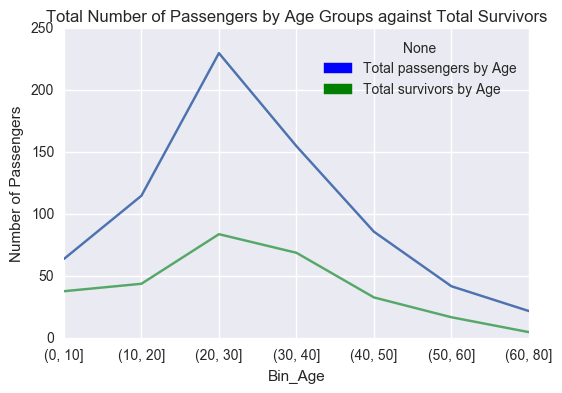

In [37]:
plt.title('Total Number of Passengers by Age Groups against Total Survivors')
plt.ylabel('Number of Passengers')
plt.xlabel('Age Group')

blue_patch = mpatches.Patch(color='blue', label='Total passengers by Age')
green_patch = mpatches.Patch(color='green', label='Total survivors by Age')
plt.legend(handles=[blue_patch, green_patch])

full_grouped_bin_age['PassengerId'].plot()
survived_grouped_bin_age['PassengerId'].plot()

Looking at the gragh, you can see that the largest gap between the two lines is between the age group 21-30 which means the highest number of deaths occured in this group but the highest number of passengers also belonged to the same group so that doesn't conclude anything. We will have to check each group's survival ratio to have a better insight. 

In [38]:
grouped_mean_bin_age = titanic_df_new.groupby('Bin_Age').mean()  #To get Survival ratios of each age group
print ('\nMean Survival Rate of Passengers by Age Groups: ')
grouped_mean_bin_age['Survived']


Mean Survival Rate of Passengers by Age Groups: 


Bin_Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 80]    0.227273
Name: Survived, dtype: float64

Before starting the analysis, I assumed that age groups between 20 to 50 would have the highest survival rate since this age group had the physical advantage over others to survive and save themselves. Either that or maybe Children and Senior Citizens would have been given priority for rescue. Either way, I was quite sure that Age would be a factor for Passenger's survival but it seems there isn't any pattern to support my assumption. All age groups have almost the same survival rate. The children have a little higher rate compared to others but it's still not enough to base a judgement on it.

In [39]:
full_grouped_pclass = titanic_df_new.groupby('Pclass').count()
print ('Number of Passengers by Pclass: ')
print (full_grouped_pclass['PassengerId'])

survived_grouped_pclass = survived_df.groupby('Pclass').count()
print ('\nNumber of Survivors by Pclass: ')
print (survived_grouped_pclass['Survived'])


Number of Passengers by Pclass: 
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

Number of Survivors by Pclass: 
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


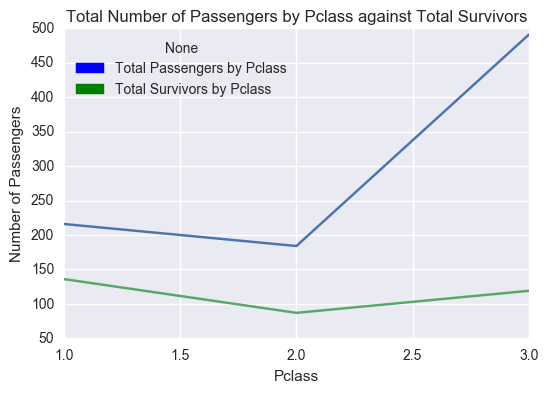

In [40]:
plt.title('Total Number of Passengers by Pclass against Total Survivors')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

blue_patch = mpatches.Patch(color='blue', label='Total Passengers by Pclass')
green_patch = mpatches.Patch(color='green', label='Total Survivors by Pclass')
plt.legend(handles=[blue_patch, green_patch])

full_grouped_pclass['PassengerId'].plot()
survived_grouped_pclass['Survived'].plot()

The Numbers and the graph shows that most deaths occured among the passengers that belonged to third class which was the lowest. The number of passengers were the highest as well among this class so let's look into each class ratio for a better and clear understanding. 

In [41]:
grouped_data = titanic_df.groupby('Pclass').mean()
print ('Ratio of People in each class who survived: ')
print(grouped_data['Survived'])


Ratio of People in each class who survived: 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Above are the ratios of people who Survived according to their Social/Economical class. Ratio for first class is 0.63 which means More than half of them survived while the ratio for second class is 0.47, which is less than half. The pattern holds for the 3rd class as well which is 0.24. Only a quarter of the population survived which belonged to 3rd class. We can safely deduce that the people with higher class were either given priority for rescue or they were provided with life boats and/or other safety equipment.

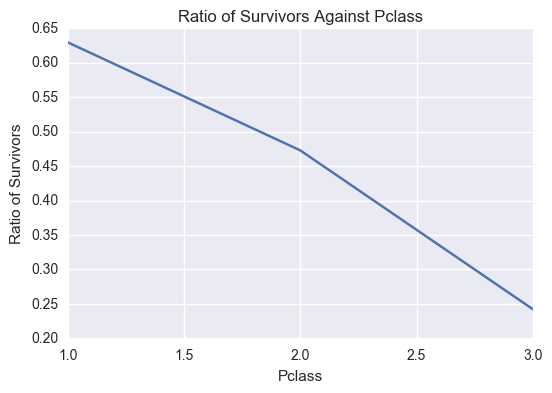

In [42]:
%matplotlib inline

grouped_data['Survived'].plot()  #contains the mean values of data grouped by PClass

plt.title('Ratio of Survivors Against Pclass')
plt.ylabel('Ratio of Survivors')
plt.xlabel('Pclass')

Although the graph is easy to understand but there's no Pclass inbetween 1, 2 or 3. It's either First Class, Second Class or Third Class. So a more appropriate visualisation would be a bar chart. It's better for comparison as well.

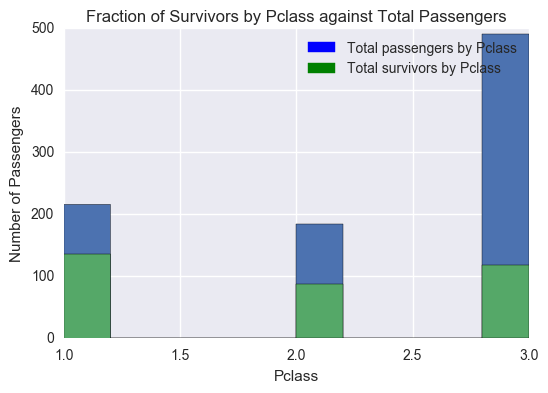

In [43]:
plt.title('Fraction of Survivors by Pclass against Total Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')

blue_patch = mpatches.Patch(color='blue', label='Total passengers by Pclass')
green_patch = mpatches.Patch(color='green', label='Total survivors by Pclass')
plt.legend(handles=[blue_patch, green_patch])

titanic_df_new['Pclass'].hist()
survived_df['Pclass'].hist()

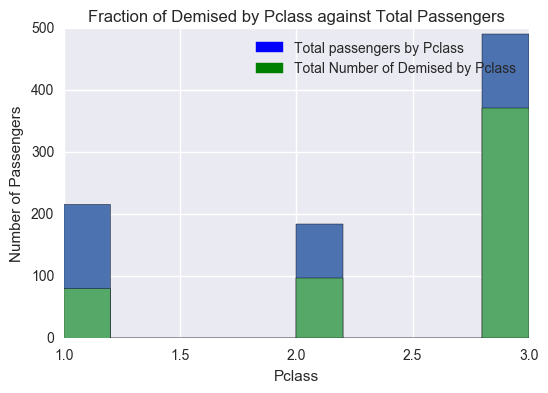

In [44]:
plt.title('Fraction of Demised by Pclass against Total Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')

blue_patch = mpatches.Patch(color='blue', label='Total passengers by Pclass')
green_patch = mpatches.Patch(color='green', label='Total Number of Demised by Pclass')
plt.legend(handles=[blue_patch, green_patch])

titanic_df_new['Pclass'].hist()
demised_df['Pclass'].hist()


In [45]:
#sorting the dataframe by Ticket Fare in descending order to get the Passengers information of those who bought the most 
#expensive tickets

fare_wise = titanic_df_new.sort_values(by='Fare', axis=0, ascending=False, inplace=False)
fare_wise.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"(30, 40]"
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"(30, 40]"
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"(30, 40]"


This is to further support my deduction that Social/Economic Status of Passengers was a factor for Survival. The above shows the top 3 Passengers who bought the most expensive tickets and all three of them survived. 

In [46]:
count_gender = titanic_df_new.groupby('Sex').count()
print ('Total Number of Passengers by their Gender: ')
print(count_gender['PassengerId'])

count_gender_survived = survived_df.groupby('Sex').count()
print ('\nTotal Number of Survivors by their Gender: ')
print(count_gender_survived['PassengerId'])
#count_gender_survived['Survived'].plot.bar()

count_gender_demised = demised_df.groupby('Sex').count()
print ('\nTotal Number of Demised by their Gender: ')
print(count_gender_demised['PassengerId'])

mean_gender = titanic_df_new.groupby('Sex').mean()
print ('\nRatio of Survivors by their Gender: ')
print (mean_gender['Survived'])


Total Number of Passengers by their Gender: 
Sex
female    314
male      577
Name: PassengerId, dtype: int64

Total Number of Survivors by their Gender: 
Sex
female    233
male      109
Name: PassengerId, dtype: int64

Total Number of Demised by their Gender: 
Sex
female     81
male      468
Name: PassengerId, dtype: int64

Ratio of Survivors by their Gender: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


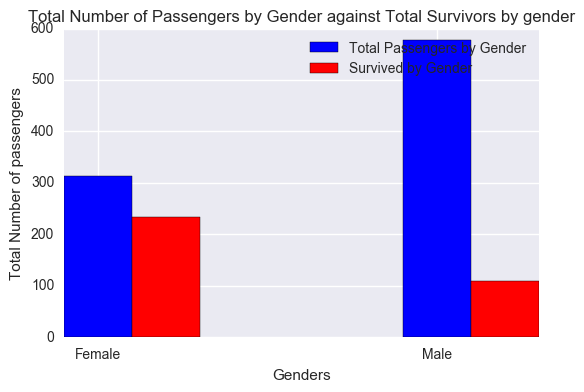

In [47]:
fig, ax = plt.subplots()

index = np.arange(2)
bar_width = 0.2
opacity = 1

rects1 = plt.bar(index, count_gender['Survived'], bar_width, alpha=opacity, color='b', label='Total Passengers by Gender')

rects2 = plt.bar(index + bar_width, count_gender_survived['Survived'], bar_width, alpha=opacity, color='r', label='Survived by Gender')

plt.xlabel('Genders')
plt.ylabel('Total Number of passengers')
plt.title('Total Number of Passengers by Gender against Total Survivors by gender')
plt.xticks(index + bar_width / 2, ('Female', 'Male'))
plt.legend()

plt.tight_layout()
plt.show()

Gender was an interesting factor to look into and beleive me, it was horrifying to know how many men died that day(including Jack) but it's a relief to find out their women survived. Women survival rate was 0.74 while the men was only 0.19. It cannot be any more clear that Gender was a big factor for survival. I've provided a bar chart for better understanding and visualisation of comparison. 

C:\Users\Mirza\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mirza\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


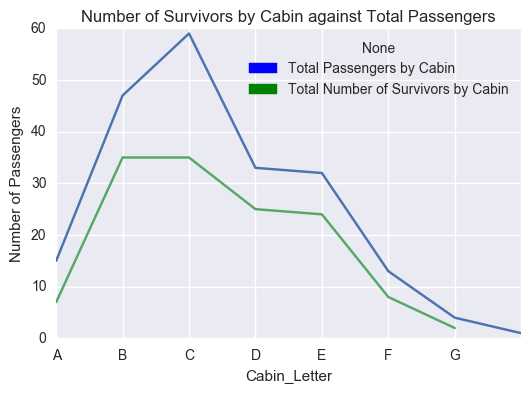

In [48]:
temp = titanic_df_new['Cabin'].str.replace('\d+', '')   #To remove all digits in values
titanic_df_new['Cabin'] = temp

temp2 = titanic_df_new['Cabin'].dropna()
titanic_df_new['Cabin_Letter'] = temp2.astype(str).str[0]  #To get the first character of each value

temp_survived = survived_df['Cabin'].str.replace('\d+', '')
survived_df['Cabin'] = temp_survived
temp_survived = temp_survived.dropna() 
survived_df['Cabin_Letter'] = temp_survived.astype(str).str[0]

plt.title('Number of Survivors by Cabin against Total Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Cabin')

blue_patch = mpatches.Patch(color='blue', label='Total Passengers by Cabin')
green_patch = mpatches.Patch(color='green', label='Total Number of Survivors by Cabin')
plt.legend(handles=[blue_patch, green_patch])

a = titanic_df_new.groupby('Cabin_Letter').count()
a['Survived'].plot()

b = survived_df.groupby('Cabin_Letter').count()
b['Survived'].plot()


In [49]:
print ('Total Number of Passengers according to their Cabin location: ')
print(a['Survived'])
print ('\nTotal Number of Survivors according to their Cabin location: ')
print(b['Survived'])

Total Number of Passengers according to their Cabin location: 
Cabin_Letter
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Survived, dtype: int64

Total Number of Survivors according to their Cabin location: 
Cabin_Letter
A     7
B    35
C    35
D    25
E    24
F     8
G     2
Name: Survived, dtype: int64


In [50]:
mean_cabin = titanic_df_new.groupby('Cabin_Letter').mean()
print ('Survival Rate of Passengers according to their Cabin Location: ')
mean_cabin['Survived']

Survival Rate of Passengers according to their Cabin Location: 


Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

It came to my mind that Cabin location might have been an important factor and therefore, I did some digging. I'm quite surprised by this but turns out, it wasn't a factor. Passengers who belonged to Cabins B, D and E have a higher survival rate so it can be assumed that these cabins were located in a place which proved to be an advantage to the assigned passengers. But it cannot be said for sure. I further looked into it that maybe there is a corelation between pclass and Cabin. These Cabins would probably belonged to those who were in first and second class. That's why they were located in a better place. Let me show you want I found out.  

In [ ]:
class_cabin1 = titanic_df_new[titanic_df_new['Pclass']==1]
class_cabin1 = class_cabin1.groupby('Cabin_Letter').count()
class_cabin1['Survived']

Cabin_Letter
A    15
B    47
C    59
D    29
E    25
T     1
Name: Survived, dtype: int64

In [ ]:
class_cabin2 = titanic_df_new[titanic_df_new['Pclass']==2]
class_cabin2 = class_cabin2.groupby('Cabin_Letter').count()
print(class_cabin2['Survived'])

class_cabin2_survived = survived_df[survived_df['Pclass']==2]
class_cabin2_survived = class_cabin2_survived.groupby('Cabin_Letter').count()
class_cabin2_survived['Survived']

In [ ]:
class_cabin3 = titanic_df_new[titanic_df_new['Pclass']==3]
class_cabin3 = class_cabin3.groupby('Cabin_Letter').count()
print (class_cabin3['Survived'])

class_cabin3_survived = survived_df[survived_df['Pclass']==3]
class_cabin3_survived = class_cabin3_survived.groupby('Cabin_Letter').count()
class_cabin3_survived['Survived']

The cabins were mostly occupied by people of high class. The lower classes hardly had any cabins. It's quite interesting that only 12 passengers of Third Class were living in Cabins and 3 of them were in E. All 3 of them survived. The location of the Cabins is a factor after all.

## Limitations:  

The Biggest challenge I faced was during the analysis of Cabin Locations. There were only 204 values provided in the data out of 891. I had to carry on taking the assumption that people of third class either couldn't afford cabins or maybe it was not included in their package. The next problem was Cabin numbers being categorial values, not numeric. It contained unique values rather than repetitive boolean type values such as Male/Female in Gender. So, it was not possible to perform operations on them without some text cleaning and spliting. I managed to remove all the digits in the Cabin Series with the help of Pandas string replace function and regular expression but some passengers were assigned more than 1 cabin so the column was still not capable to apply group operations on it and get accurate results. So I extracted the First letter of each value due to which I was then able to perform my analysis on it.  

# Conclusion:  

The data brought up results that I was not expecting. First of all, Age turned out to be not a factor for survival. However, PClass was. We saw that First and Second Class had a higher Survival rate than Third Class. The Other major factor was Gender. Women had a significantly higher survival rate than men. We can logically assume that due to shortage of resources, the rich and the women were given higher priority. The last factor that I deduced was the Location of the Cabins. Although It cannot be said in full confidence since I don't have a map of the ship but still, given the data, it certainly did seems that some Cabins were located in a place which proved to be safer. 